# Classification Assignment 4

AIML Id: 2020AIML043

<b>Support Vector Machine Assignment</b>

The given dataset is from Lending Club which connects borrowers with investors. We will use lending data from 2007-2010 and build a classifier model to predict whether or not the borrower has paid back their loan in full.

Here are what the columns represent :

i) credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.<br/>
ii) purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").<br/>
iii) int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.<br/>
iv) installment: The monthly installments owed by the borrower if the loan is funded.<br/>
v) log.annual.inc: The natural log of the self-reported annual income of the borrower.<br/>
vi) dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).<br/>
vii) fico: The FICO credit score of the borrower.<br/>
viii) days.with.cr.line: The number of days the borrower has had a credit line.<br/>
ix) revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).<br/>
x) revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).<br/>
xi) inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.<br/>
xii) delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.<br/>
xiii) pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).<br/>
xiv) not.fully.paid: whether or not the borrower paid back their loan in full<br/>
 
QUESTIONS:

1. Read the dataset, lookout for missing values, compute statistical summary of dataset

2. Visualize the feature relationships - Pairwise Plot, Heatmap, Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid.
 
3. Split the Data - Divide into features and target, Divide into training and testing, Ensure that data is divided with a more or less equal ratio of class 1 and 0 in both test and train set
 
4. Implement the SVM Model - Scale the features, Train Model, Predict

5. Measure Accuracy - Classification Report

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.svm import SVC

### 1. Read the dataset, lookout for missing values, compute statistical summary of dataset

In [3]:
# Read input csv
data = pd.read_csv("loan_data-1.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.tail(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9568,0,all_other,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,1,0
9569,0,home_improvement,0.1426,823.34,12.429216,3.62,722,3239.958333,33575,83.9,5,0,0,1
9570,0,all_other,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1
9571,0,all_other,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [5]:
# Printing shape of input dataset - number of rows & columns
data.shape

(9578, 14)

The input dataset contains 9578 rows & 14 columns.

In [6]:
# Printing schema of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


From the above, we have only one category feature i.e. purpose column. Rest all features are of type either integer or float.<br/><br/>
<b>Independent Features</b> = credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs & pub.rec<br/>
<b>Target Feature </b> = not.fully.paid (having values as 0 or 1 - Binay Classification)

In [7]:
# Check for missing values
print('Check for missing values in all features : ', '\n')
for col in data.columns:
    print(col, '-', data[col].isnull().sum())

Check for missing values in all features :  

credit.policy - 0
purpose - 0
int.rate - 0
installment - 0
log.annual.inc - 0
dti - 0
fico - 0
days.with.cr.line - 0
revol.bal - 0
revol.util - 0
inq.last.6mths - 0
delinq.2yrs - 0
pub.rec - 0
not.fully.paid - 0


No features contains null values in the input dataset.

In [8]:
# Checking for duplicates
duplicates = data[data.duplicated()]
print(len(duplicates), ' duplicates found.')

0  duplicates found.


In [9]:
# Unique values for all features
data.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

'credit.policy' feature has two unique values i.e. 0 & 1, 'purpose' feature has 7 unique values, 'pub.rec' feature has 6 unique values.

In [10]:
# Print statistical summart of dataset
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


From the above,
1. 'fico' feature (credit score) has maximum value of 827 & minimum value of 612.
2. 'dti' feature (debt to income ratio) has maximum value of 29.96 & minimum value of 0.00. Having 'dti' feature value as 0 means borrower is having 0 debt.
3. 'delinq.2yrs' feature (number of times the borrower had been 30+ days past due on a payment in the past 2 years) has maximum value of 13 & minimum value of 0.
4. 'pub.rec' feature (public derogatory records for borrower) has maximum value of 5 & minimum value of 0.

<b>Analysing 'purpose' categorical feature -</b>

In [11]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

The 'purpose' feature has 6 distinct values. Most of the rows in the input dataset is occupied by debt_consolidation & all_other values.

<b>Analysing target variable 'not.fully.paid' -</b>

In [44]:
# Analysing the target variable - not.fully.paid
pos = data[data['not.fully.paid'] == 1]
neg = data[data['not.fully.paid'] == 0]

print('No. of positive cases (where loan is not paid fully)  - ', len(pos))
print('No. of negative cases (where loan is paid fully)      - ', len(neg))
print('\n')
print('Proportion of postive to negative cases - ', (len(pos)/len(neg)) * 100)

No. of positive cases (where loan is not paid fully)  -  1533
No. of negative cases (where loan is paid fully)      -  8045


Proportion of postive to negative cases -  19.05531385954009


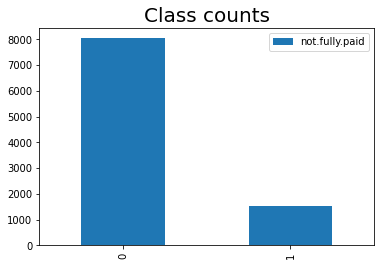

In [13]:
# Plotting bar plot for target variable 'not.fully.paid'
data['not.fully.paid'].value_counts().plot(kind="bar")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});
plt.legend()

<b>The data set is imbalanced because positive examples (i.e. belonging to “not paid fully = 1” category) are only 19%.</b>

### 2. Visualize the feature relationships - Pairwise Plot, Heatmap, create a countplot using sns showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

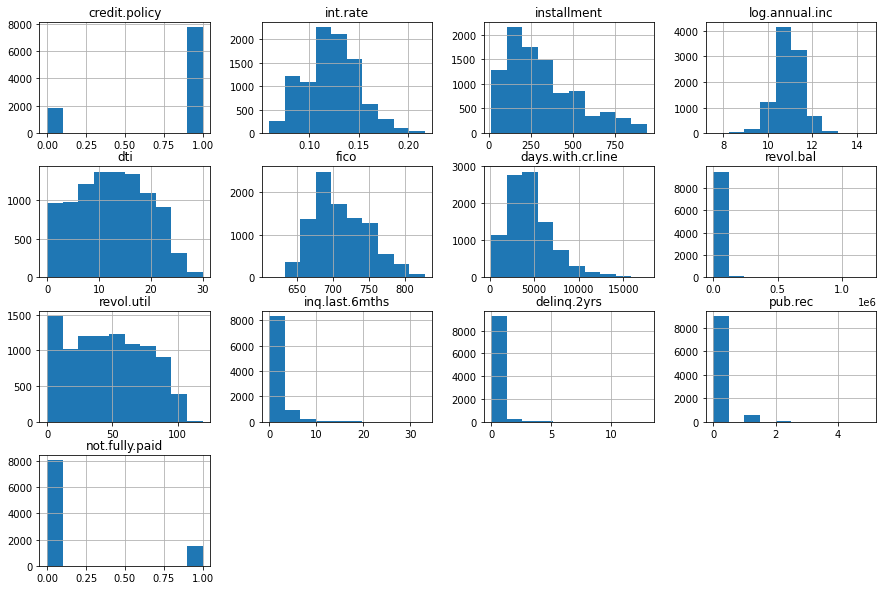

In [14]:
# Plotting histogram for all variables
data.hist(figsize = (15, 10))
plt.show()

From the above,
1. int.rate, fico & log.annual.inc feature shows normal distribution in input dataset.
2. More rows for borrowers having fully paid the loan than borrowers not paying the loan.

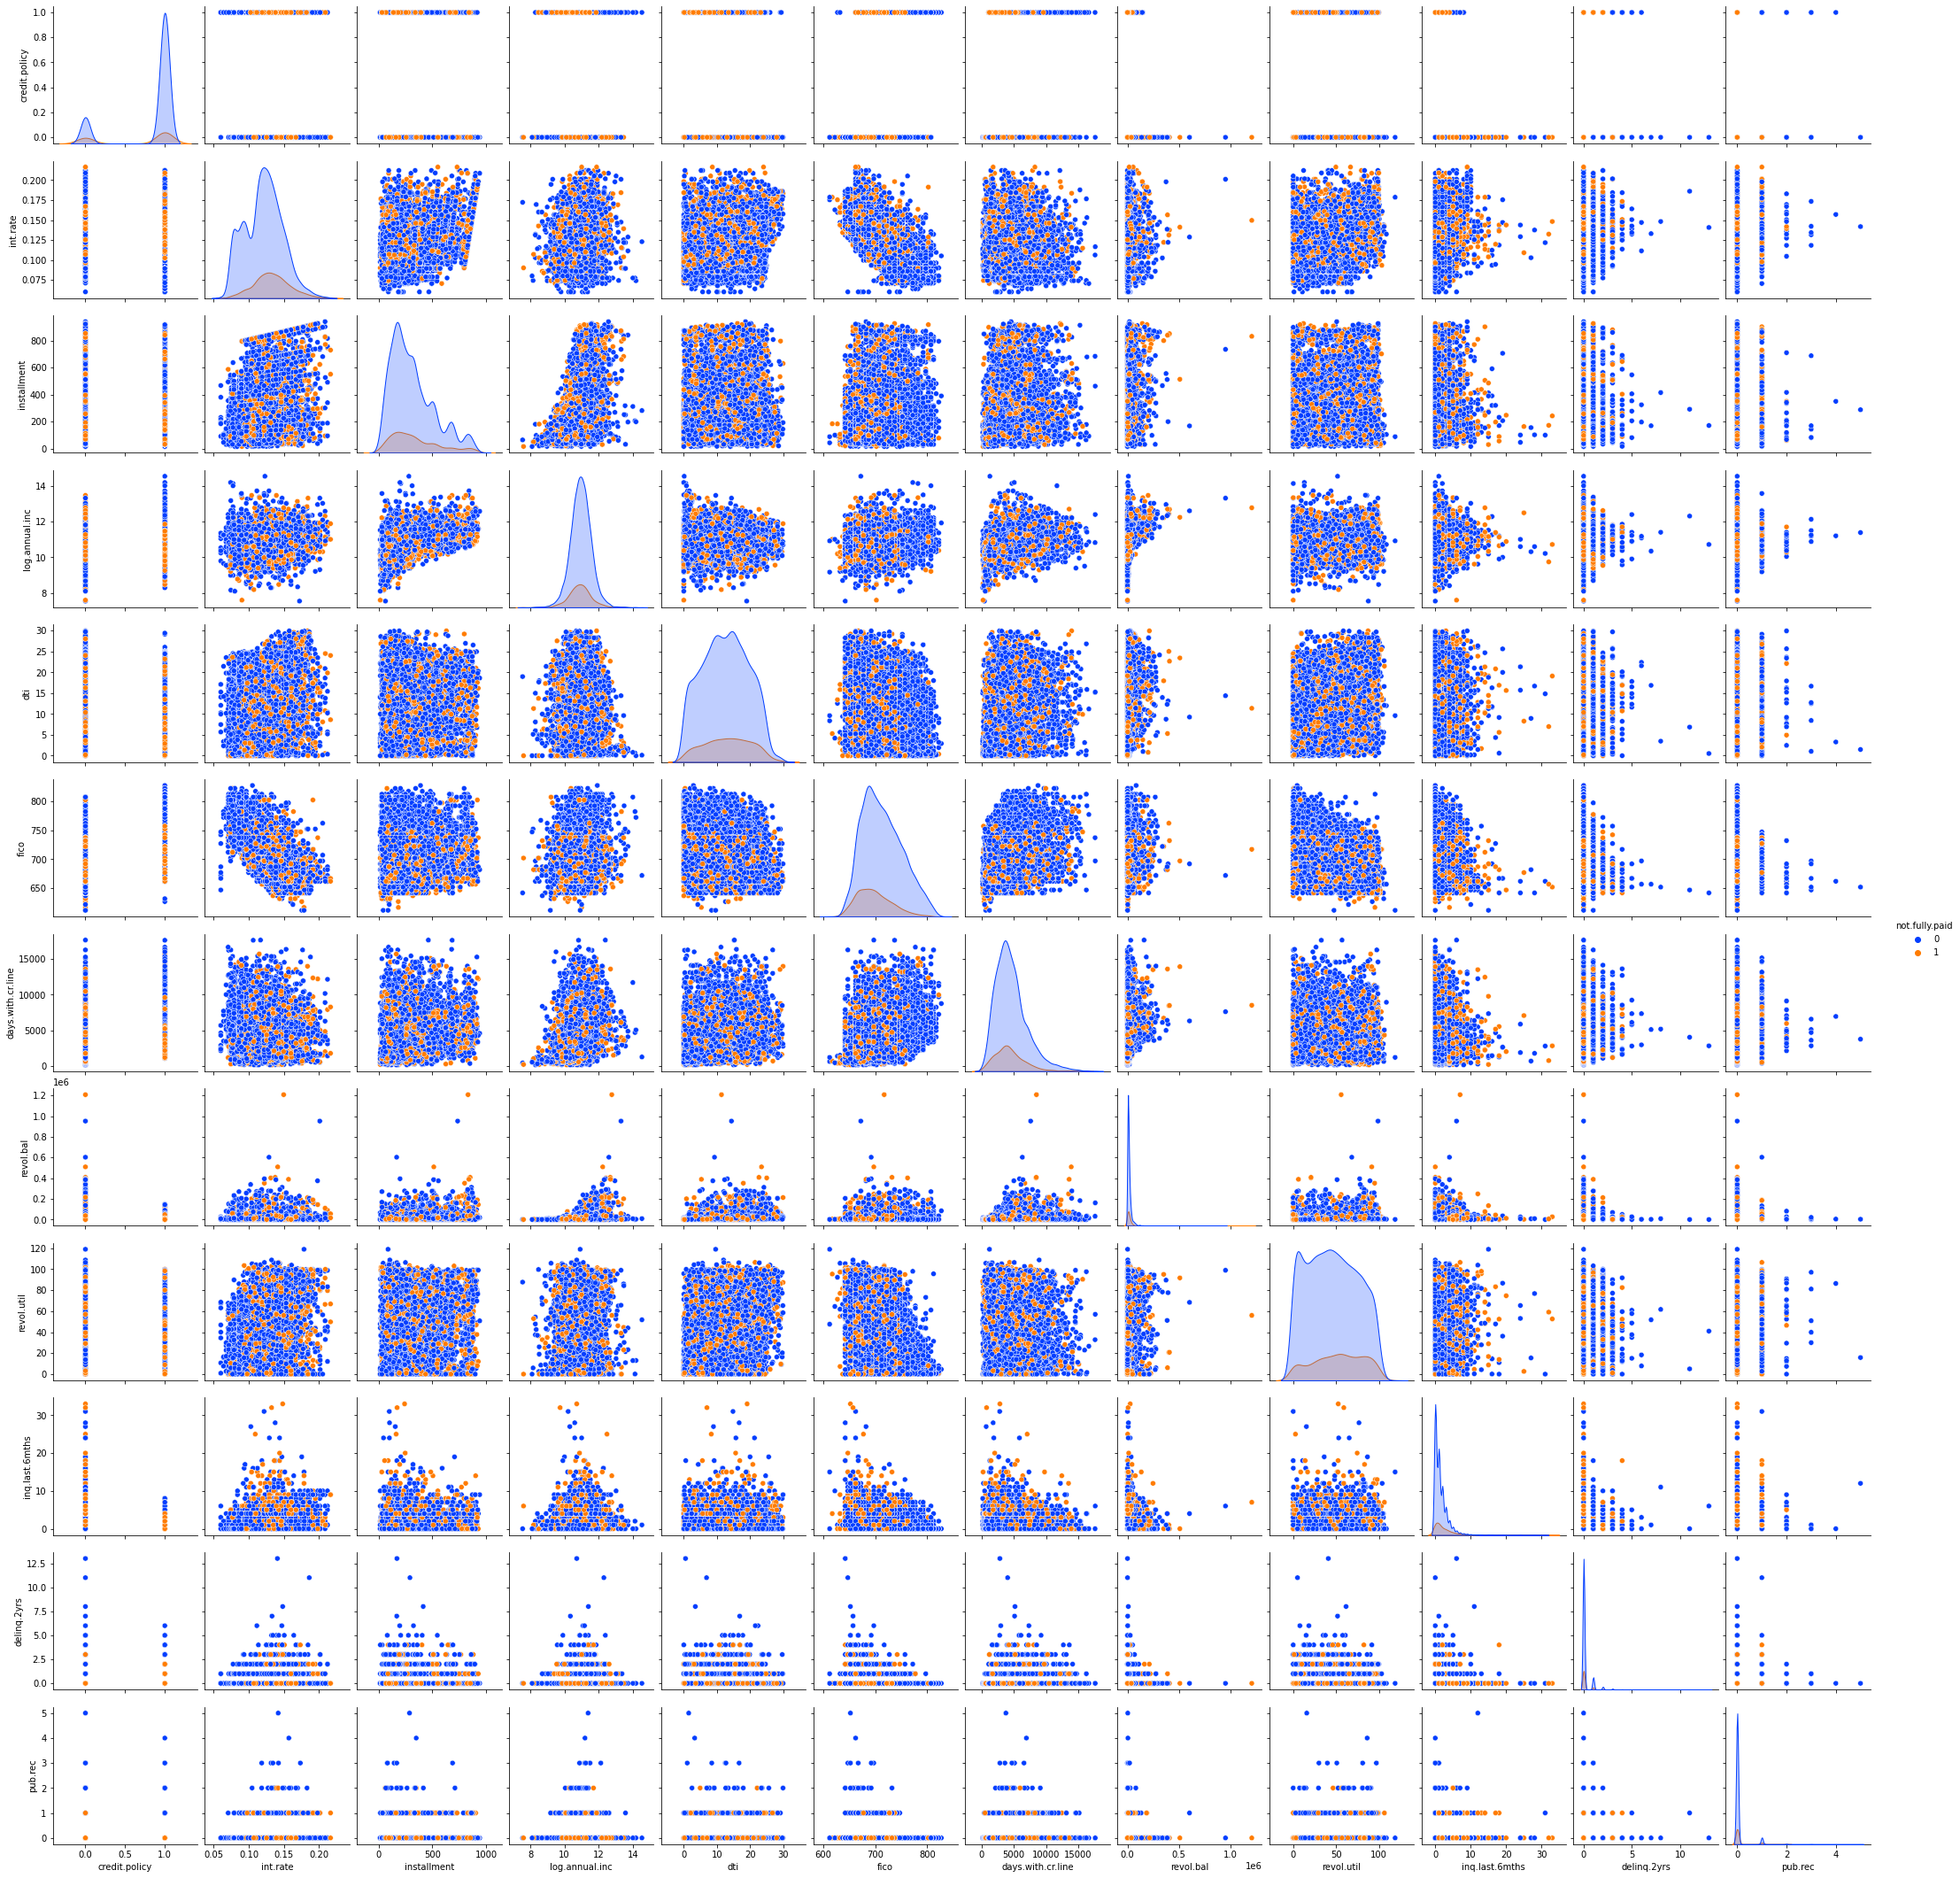

In [15]:
df = data.copy(deep=True)

target = df['not.fully.paid']
features = df.drop('not.fully.paid', axis=1)
sns.pairplot(df, hue="not.fully.paid", palette="bright")

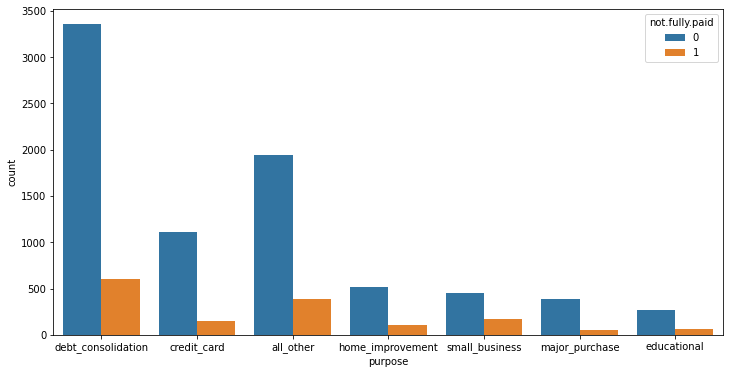

In [16]:
# Plotting purpose vs not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(x=data['purpose'], hue=data['not.fully.paid'])
plt.show()

In our dataset, more rows for 'debt_consolidation' purpose type than any other purpose type. For all purpose types, more borrowers are present who have paid the loan.

<b>Convert 'purpose' categorical variable (nominal type) to numerical variable using dummy variables -</b>

In [17]:
# Create dummy variables from the feature purpose
data_wo_cat = data.copy(deep=True)

data_wo_cat = pd.get_dummies(data_wo_cat, columns=['purpose'], drop_first=True)

# Printing shape of dataframe after dummy variables creation
data_wo_cat.shape

(9578, 19)

In [18]:
# Print all columns - to check for the newly created columns
data_wo_cat.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [19]:
# Moving target variable at the end
not_fully_paid_col = data_wo_cat.pop('not.fully.paid')
data_wo_cat.insert(len(data_wo_cat.columns), 'not.fully.paid', not_fully_paid_col)

data_wo_cat.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0,0


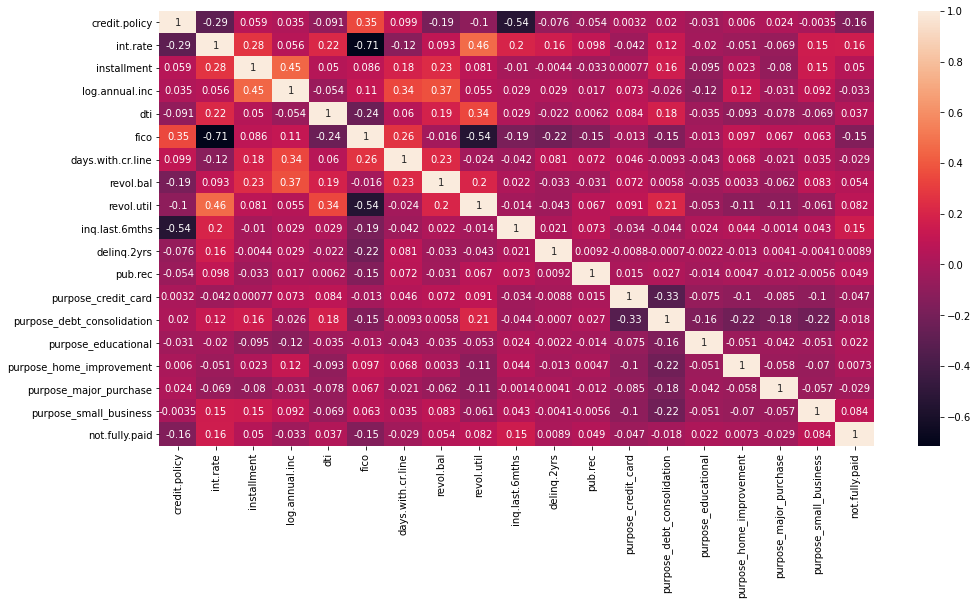

In [20]:
# Get corrleation between various features
corr = data_wo_cat.corr()

# Display heatmap of the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True)
plt.show()

From the above graph,
1. int.rate & fico are strongly correlated to each other in a negative sense. So, one can be dropped from the input dataset.
2. credit.policy & inq.last.6mnths are moderately correlated to each other in a negative sense.
3. revol.util & fico are moderately correlated to each other in a negative sense.

In [21]:
# Dropping 'int.rate' from the dataset
data_wo_cat.drop(['int.rate'], axis=1, inplace=True)
data_wo_cat.columns

Index(['credit.policy', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'not.fully.paid'],
      dtype='object')

### 3. Split the Data - divide into features and target, divide into training and testing, ensure that data is divided with a more or less equal ratio of class 1 and 0 in both test and train set

<b>Divide the dataset into features and target -</b>

In [22]:
# Extracting target variable & input variables
col_length = len(data_wo_cat.columns)
X = data_wo_cat.iloc[:,0:col_length - 1]  #independent columns
y = data_wo_cat.iloc[:,-1]    #target column i.e not.fully.paid

print('Shape of features dataset - ', X.shape)
print('Shape of target dataset   - ', y.shape)

Shape of features dataset -  (9578, 17)
Shape of target dataset   -  (9578,)


<b>Divide the features & target variables into training and testing data -</b>

In [23]:
# Stratified split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

print('Shape of Training dataset (features) - ', X_train.shape)
print('Shape of Test dataset (features)     - ', X_test.shape)

Shape of Training dataset (features) -  (6704, 17)
Shape of Test dataset (features)     -  (2874, 17)


<b>Ensure that data is divided with a more or less equal ratio of class 1 and 0 in both test and train set -</b>

In [45]:
# Calculate ratio of class 1 & 0 in training dataset
pos_train = y_train[y_train == 1]
neg_train = y_train[y_train == 0]

print('Training dataset - ')
print('No. of positive cases (where loan is not paid fully)  - ', len(pos_train))
print('No. of negative cases (where loan is paid fully)      - ', len(neg_train))
print('Proportion of postive to negative cases - ', (len(pos_train)/len(neg_train)) * 100)

Training dataset - 
No. of positive cases (where loan is not paid fully)  -  1073
No. of negative cases (where loan is paid fully)      -  5631
Proportion of postive to negative cases -  19.055229976913516


In [46]:
# Calculate ratio of class 1 & 0 in test dataset
pos_test = y_test[y_test == 1]
neg_test = y_test[y_test == 0]

print('Test dataset - ')
print('No. of positive cases (where loan is not paid fully)  - ', len(pos_test))
print('No. of negative cases (where loan is paid fully)      - ', len(neg_test))
print('Proportion of postive to negative cases - ', (len(pos_test)/len(neg_test)) * 100)

Test dataset - 
No. of positive cases (where loan is not paid fully)  -  460
No. of negative cases (where loan is paid fully)      -  2414
Proportion of postive to negative cases -  19.05550952775476


<b>From the above, we can confidently say that percentage of positive to negative cases (19.05%) is same in both training & test dataset.</b>

### 4. Implement the SVM Model - Scale the features, Train Model, Predict 

<b>Scale the features using Standard Scaler -</b>

In [26]:
# Applying Standard Scaler on training & test data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Build linear SVM model
model = SVC(kernel='linear', C=1.0)
model

SVC(kernel='linear')

<b>Train the SVM model using training data - </b>

In [28]:
# Fit training data to the SVC model object
model.fit(X_train, y_train)

SVC(kernel='linear')

<b>Predict on test data with built model - </b>

In [29]:
# Predict on test dataset
y_pred = model.predict(X_test)

In [30]:
# Print model scores on training & test data
print('Model Score - ')
print('Score on training dataset - ', model.score(X_train, y_train))
print('Score on test dataset     - ', model.score(X_test, y_test))

Model Score - 
Score on training dataset -  0.8399463007159904
Score on test dataset     -  0.8399443284620738


In [31]:
# Print accuracy score
print('Accuracy Score - ',  accuracy_score(y_test, y_pred))

Accuracy Score -  0.8399443284620738


In [40]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2414    0]
 [ 460    0]]


The model is giving accuracy score of 83.9, but from the confusion matrix - it looks that the model is not able to predict any instance of borrower not paying the loan (y_test - 1 & y_pred - 1) correctly.<br/>

<b>Total true detections = 2414 + 0 = 2414</b>

<b>Trying various values of kernel & C parameters to determine the best model - </b>

Building SVC model with C = (0.1, 1, 10, 100) & kernel = (poly, rbf).<br/>

In [41]:
# Loop through different values of kernel & C
for kern in ('rbf', 'poly'):
    for c_param in (0.1, 1, 10, 100):
        svc = SVC(kernel=kern, C=c_param)
        svc.fit(X_train, y_train)
        y_pred1 = svc.predict(X_test)
        print('For kernel - ', kern, ' and C - ', c_param, ', Accuracy score - ', accuracy_score(y_test, y_pred1))

For kernel -  rbf  and C -  0.1 , Accuracy score -  0.8399443284620738
For kernel -  rbf  and C -  1 , Accuracy score -  0.8413361169102297
For kernel -  rbf  and C -  10 , Accuracy score -  0.824982602644398
For kernel -  rbf  and C -  100 , Accuracy score -  0.802018093249826
For kernel -  poly  and C -  0.1 , Accuracy score -  0.8399443284620738
For kernel -  poly  and C -  1 , Accuracy score -  0.8347251217814892
For kernel -  poly  and C -  10 , Accuracy score -  0.8221990257480863
For kernel -  poly  and C -  100 , Accuracy score -  0.8208072372999304


<b>The best model can be seen with kernel = rbf & C = 1 -</b>

In [42]:
# Building model with kernel = rbf & C = 1
svc = SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)
y_pred_best = svc.predict(X_test)

# Print accuracy score
print('Accuracy Score - ',  accuracy_score(y_test, y_pred_best))

# Print confusion matrix
cm1 = confusion_matrix(y_test, y_pred_best)
print(cm1)

Accuracy Score -  0.8413361169102297
[[2413    1]
 [ 455    5]]


The model built with kernel - rbf & C = 1 is showing higher accuracy of 84.13, with showing few correct predictions for instances of borrower not paying the loan (y_test - 1 & y_pred - 1).<br/>

<b>Total true detections = 2413 + 5 = 2418</b>

### 5. Measure Accuracy - Classification Report 

<b>Classification Report -</b>

In [43]:
print('Classfication Report -')
print(classification_report(y_test, y_pred_best))

Classfication Report -
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.83      0.01      0.02       460

    accuracy                           0.84      2874
   macro avg       0.84      0.51      0.47      2874
weighted avg       0.84      0.84      0.77      2874



The above classification report is generated using the best model (with kernel as rbf & C as 1). Showing same accuracy of 84%.

--- END ---